In [1]:
from sklearn.feature_extraction.text import CountVectorizer

v=CountVectorizer()
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

v=CountVectorizer(ngram_range=(2,2))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor hathodawala': 4,
 'hathodawala is': 1,
 'is looking': 2,
 'looking for': 3,
 'for job': 0}

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

v=CountVectorizer(ngram_range=(1,2))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 9,
 'hathodawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodawala': 10,
 'hathodawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

v=CountVectorizer(ngram_range=(1,3))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [9]:
import spacy 

nlp=spacy.load("en_core_web_sm")

def preprocess(text):
    doc=nlp(text)
    
    filtered_token=[]
    
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_token.append(token.lemma_)
        
    return " ".join(filtered_token)

preprocess("Loki is eating pizza")

'Loki eat pizza'

In [7]:
corpus=[
 "Thor ate pizza",
 "Loki is tall",
"Loki is eating pizza"
]

In [10]:
corpus_processed=[preprocess(text) for text in corpus]
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [11]:
v=CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [12]:
v.transform(['Thor eat pizza']).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [13]:
v.transform(['Hulk eat pizza']).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [15]:
import pandas as pd
    
df=pd.read_json("news_dataset.json")

print(df.shape)
df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [18]:
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

In [20]:
min_sample=1381

df_business=df[df.category=="BUSINESS"].sample(min_sample,random_state=2022)
df_sports=df[df.category=="SPORTS"].sample(min_sample,random_state=2022)
df_crime=df[df.category=="CRIME"].sample(min_sample,random_state=2022)
df_science=df[df.category=="SCIENCE"].sample(min_sample,random_state=2022)

In [23]:
df_balanced=pd.concat([df_business,df_sports,df_crime,df_science],axis=0)
df_balanced.sample(10)

,text,category
11926,Russian Curlers To Return Bronze Medal After F...,SPORTS
8477,'It's A Long Story' How Sandusky Got A New Law...,CRIME
5064,UPDATE: 2 Marines Dead After Military Aircraft...,CRIME
7337,Is the Eurozone Drifting Apart? It now falls t...,BUSINESS
7568,4 Attitudes Young Managers Can Learn From Olde...,BUSINESS
4051,Los Angeles Thieves Steal Second Ambulance In ...,CRIME
527,How To Convict A Rapist Bill Cosby's guilty ve...,CRIME
2204,The Best Race of Iditarod 2015 Didn't Take Pla...,SPORTS
9386,9 Things Successful People Won't Do My last po...,BUSINESS
10131,The Latest Video Of Jahlil Okafor’s Fight Look...,SPORTS


In [24]:
df_balanced.category.value_counts()

BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64

In [25]:
target={"BUSINESS":0,"SPORTS":1,"CRIME":2,"SCIENCE":3}

df_balanced['category_num']=df_balanced.category.map(target)

In [26]:
df_balanced.sample(5)

,text,category,category_num
9365,FIFA Hires Former Clinton Aide's Firm Amid Sca...,SPORTS,1
4302,When It's Time To Take Your Business Elsewhere...,BUSINESS,0
12318,"On Mars, Who's in Charge? One sign we're on ou...",SCIENCE,3
6705,Business Meetings: Making a Good Impression Th...,BUSINESS,0
9441,Timeless or New? The ABCs of Marketing in a D...,BUSINESS,0


In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df_balanced.text,df_balanced.category_num,test_size=0.20,random_state=2022,
                                              stratify=df_balanced.category_num)

In [30]:
print(X_train.shape)
X_train.head()

(4419,)


7589     Ovulating Women Prefer Images of Penetration O...
10442    Scientists Discover Spooky Influence On Baby N...
8792     Olympic Race Walker Steps Up To Propose To His...
1733     Beloved Bipedal Bear Named Pedals Believed Kil...
2526     Elizabeth Smart Gave Birth To Baby Girl, Fathe...
Name: text, dtype: object

In [31]:
y_train.value_counts()

3    1105
2    1105
0    1105
1    1104
Name: category_num, dtype: int64

In [32]:
y_test.value_counts()

1    277
0    276
3    276
2    276
Name: category_num, dtype: int64

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

pipe=Pipeline([
    ("vectorizer_bow",CountVectorizer()),
    ("Multi NB",MultinomialNB())
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

pipe=Pipeline([
    ("vectorizer_bow",CountVectorizer(ngram_range=(1,2))),
    ("Multi NB",MultinomialNB())
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       276
           1       0.95      0.74      0.83       277
           2       0.82      0.88      0.85       276
           3       0.92      0.78      0.84       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



In [36]:
X_test[:5]

3716     African Nation Slaps Exxon With Fine Nearly 7 ...
608      These Cringe-Worthy Stories Show It Can Be Har...
11172    LISTEN: The Accidental Discovery That Proved T...
1346     Build Loyalty -- The Cost -- $00.00 Remember y...
1356     Man Killed By Michigan Police Wasn't Targeting...
Name: text, dtype: object

In [37]:
y_test[:5]

3716     0
608      3
11172    3
1346     0
1356     2
Name: category_num, dtype: int64

In [38]:
y_pred[:5]

array([0, 0, 3, 0, 2], dtype=int64)

In [44]:
df_balanced['preprocessed_txt']=df_balanced.text.apply(preprocess)

In [45]:
df_balanced.sample(5)

,text,category,category_num,preprocessed_txt
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,GCC Business Leaders remain Confident Face Reg...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment ceo FreshBooks Talks give build...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,Leverage intuition decision making feel safe r...


In [46]:
X_train,X_test,y_train,y_test = train_test_split(df_balanced.preprocessed_txt,df_balanced.category_num,test_size=0.20,random_state=2022,
                                              stratify=df_balanced.category_num)

In [47]:
pipe=Pipeline([
    ("vectorizer_bow",CountVectorizer(ngram_range=(1,2))),
    ("Multi NB",MultinomialNB())
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       276
           1       0.92      0.82      0.87       277
           2       0.83      0.92      0.87       276
           3       0.90      0.81      0.85       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



#### Plot confusion matrix

In [48]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[243,   8,  17,   8],
       [ 10, 228,  29,  10],
       [ 15,   2, 253,   6],
       [ 36,   9,   7, 224]], dtype=int64)

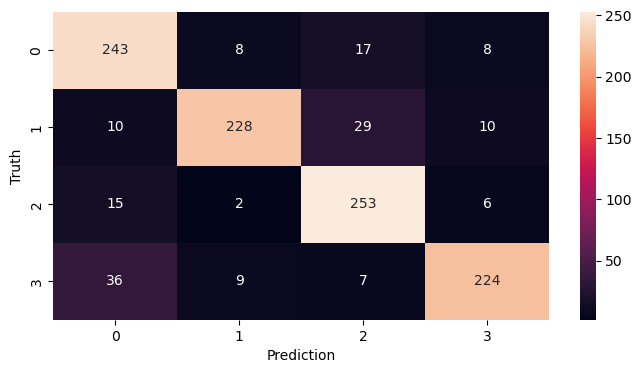

In [52]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show()